# Unit 5 - Financial Planning

In [68]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools1 import MCSimulation

%matplotlib inline

In [69]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [70]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [71]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [72]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()

# Fetch current ETH price
eth_data = requests.get(eth_url).json()

# Compute current value of my crpto
my_btc_value = my_btc * btc_data['data']['1']['quotes']['CAD']['price']
my_eth_value = my_eth * eth_data['data']['1027']['quotes']['CAD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $45032.64
The current value of your 5.3 ETH is $11381.91


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [73]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [74]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [75]:
# Format current date as ISO format
today = pd.Timestamp("2023-06-15", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                              \
                            open   high      low  close   volume trade_count   
timestamp                                                                      
2023-06-15 04:00:00+00:00  98.29  98.46  98.1337  98.45  7471994       29262   

                                         SPY                                   \
                                vwap    open   high     low  close     volume   
timestamp                                                                       
2023-06-15 04:00:00+00:00  98.355119  436.33  443.9  436.23  442.6  110301302   

                                                   
                          trade_count        vwap  
timestamp                                          
2023-06-15 04:00:00+00:00      748180  440.705812

In [76]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"].iloc[-1]
spy_close_price = df_portfolio["SPY"]["close"].iloc[-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.45
Current SPY closing price: $442.6


In [77]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22130.00
The current value of your 200 AGG shares is $19690.00


### Savings Health Analysis

In [78]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [my_btc_value + my_eth_value,my_agg_value + my_spy_value]

columns = ['amount']
index = ['crypto', 'shares']

df_savings = pd.DataFrame(savings_data, columns=columns, index=index)

# Display savings DataFrame
display(df_savings)

amount
crypto  56414.55584
shares  41820.00000

<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

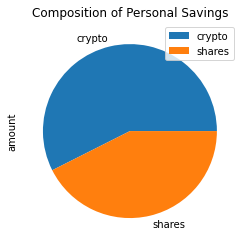

In [79]:
# Plot savings pie chart
df_savings.plot(kind="pie", y="amount",legend=True,title="Composition of Personal Savings")

In [80]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_saving = 0.0
for savings in df_savings['amount']:
    total_saving += savings
    
# Validate saving health
if round(total_saving, 2) > round(emergency_fund, 2):
    print('Congratulations! You have enough money in your emergency fund.')
elif round(total_saving, 2) == round(emergency_fund, 2):
    print('Cngratulating the person on reaching this financial goal.')
else:
    print(f'{round(emergency_fund - total_saving, 2)} dollars away from reaching the goal.')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [81]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [82]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["SPY", "AGG"]
timeframe = "1D"

df_portfolio_5year = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG_5year = df_portfolio_5year[df_portfolio_5year['symbol']=='AGG'].drop('symbol', axis=1)
SPY_5year = df_portfolio_5year[df_portfolio_5year['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG_5year,SPY_5year],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [83]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_simulation = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[0.6, 0.4],
    num_simulation=500,
    num_trading_days=252 * 30
)

In [84]:
# Printing the simulation input data
mc_simulation.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [85]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2          3          4         5         6    \
0     1.000000  1.000000  1.000000   1.000000   1.000000  1.000000  1.000000   
1     0.999575  1.003897  0.992080   0.993978   0.992660  1.000594  0.999862   
2     1.000138  1.007950  0.992991   0.994958   0.985796  1.006136  1.004315   
3     0.994335  1.010139  0.996767   0.992537   0.982178  1.009862  1.001318   
4     0.994089  1.015498  0.992603   1.003234   0.987294  1.001316  1.001204   
...        ...       ...       ...        ...        ...       ...       ...   
7556  7.861445  4.880394  8.609841  15.887671  12.128561  4.863830  5.171762   
7557  7.809160  4.872896  8.556588  15.832111  12.156424  4.878446  5.182549   
7558  7.850447  4.840376  8.541375  15.819466  12.170859  4.855642  5.158233   
7559  7.811029  4.835883  8.566862  15.729249  12.177376  4.876652  5.135162   
7560  7.783291  4.851817  8.578547  15.629324  12.185582  4.870427  5.132550   

           7          8         9    ...       490       491       492  \
0     1.000000   1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.006096   0.997290  1.002912  ...  0.998746  0.994684  1.002941   
2     1.012461   1.001675  1.005071  ...  0.994021  0.994826  1.003359   
3     1.014933   1.004493  1.010659  ...  0.997527  1.000734  1.004174   
4     1.013383   1.007240  1.009808  ...  0.999103  1.004908  1.002311   
...        ...        ...       ...  ...       ...       ...       ...   
7556  2.974461  12.125226  4.831123  ...  9.627610  5.204236  3.317804   
7557  2.983687  12.218205  4.829520  ...  9.660514  5.184855  3.273796   
7558  2.988143  12.279429  4.844998  ...  9.619090  5.214792  3.253150   
7559  2.994557  12.199454  4.817437  ...  9.575525  5.249888  3.274691   
7560  3.009719  12.325829  4.796545  ...  9.594026  5.237340  3.277894   

            493       494       495       496        497       498       499  
0      1.000000  1.000000  1.000000  1.000000   1.000000  1.000000  1.000000  
1      0.997406  0.996688  1.004203  1.004991   0.992011  0.996227  1.004270  
2      0.993708  1.000366  1.001901  1.009066   0.995118  0.996182  1.010658  
3      0.985745  0.997279  1.006647  1.011819   0.994280  1.002066  1.013411  
4      0.981349  1.000135  1.006744  1.008422   0.990892  1.002259  1.011299  
...         ...       ...       ...       ...        ...       ...       ...  
7556  11.029731  7.460410  7.558886  6.608008  11.184799  8.718274  6.879308  
7557  11.048699  7.428580  7.519425  6.578311  11.206683  8.752276  6.934486  
7558  10.999832  7.409193  7.539295  6.594826  11.224211  8.700677  6.902927  
7559  10.903363  7.458113  7.565272  6.618403  11.287715  8.738028  6.899555  
7560  10.888118  7.464199  7.573114  6.657021  11.275186  8.724140  6.886734  

[7561 rows x 500 columns]

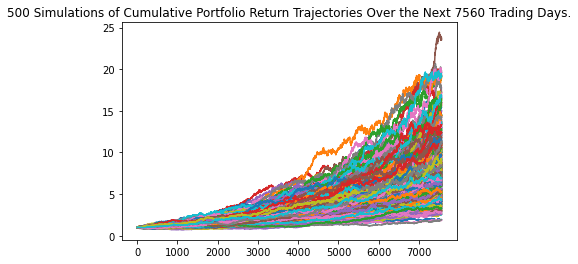

In [86]:
# Plot simulation outcomes
line_plot = mc_simulation.plot_simulation()

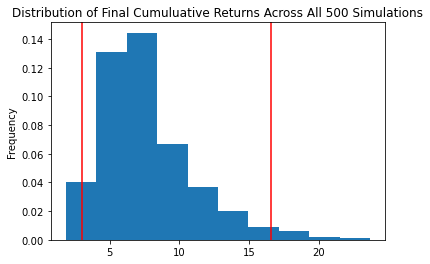

In [87]:
# Plot probability distribution and confidence intervals
dist_plot = mc_simulation.plot_distribution()

### Retirement Analysis

In [88]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl=mc_simulation.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              7.640437
std               3.364199
min               1.834075
25%               5.284930
50%               7.011820
75%               8.881830
max              23.710881
95% CI Lower      2.977316
95% CI Upper     16.613873
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [89]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $59546.33 and $332277.46


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [90]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $89319.49 and $498416.19


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [91]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
ms_stock_data = MCSimulation(
    portfolio_data = df_stock_data,
    weights= [0.6, 0.4],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [92]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
ms_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.004120  1.001055  0.994074  0.992089  1.006847  0.995367  1.002386   
2     1.005106  1.002661  0.994949  0.992439  1.006326  0.989660  0.998527   
3     1.006989  1.006253  0.994476  0.993609  0.998731  0.990857  0.999488   
4     1.005658  1.008835  0.990738  0.995803  0.994549  1.003194  1.002099   
...        ...       ...       ...       ...       ...       ...       ...   
1256  0.992467  1.466058  1.258884  1.866352  1.670723  1.148347  1.471940   
1257  1.002124  1.464169  1.255985  1.862664  1.679058  1.152525  1.468410   
1258  0.992809  1.460727  1.257998  1.855797  1.672270  1.150586  1.475244   
1259  0.988245  1.476056  1.267203  1.853170  1.676722  1.159311  1.466250   
1260  0.988988  1.476902  1.264917  1.873480  1.678157  1.154134  1.462543   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.003125  0.996833  1.003844  ...  0.995318  1.006559  0.997888   
2     1.001945  0.996787  1.010519  ...  0.997346  1.008497  1.001845   
3     1.012148  0.993500  1.011319  ...  0.994360  1.011434  1.005250   
4     1.011900  0.995647  1.010898  ...  0.996030  1.013217  1.004541   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.837898  1.189316  1.217349  ...  1.638681  1.602328  1.313763   
1257  1.845814  1.192737  1.221386  ...  1.642360  1.603063  1.316648   
1258  1.847652  1.188804  1.215054  ...  1.649052  1.604414  1.321307   
1259  1.851468  1.181198  1.224223  ...  1.649738  1.605300  1.321191   
1260  1.860168  1.176292  1.232139  ...  1.647114  1.610170  1.325422   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.004177  1.006521  1.005134  1.001382  1.007332  1.000826  0.996886  
2     0.997831  1.004172  1.011489  1.003492  1.005880  0.993146  0.997233  
3     1.000621  1.015318  1.008109  1.012691  1.003137  0.988664  0.994230  
4     0.997834  1.008355  1.003917  1.022127  1.005876  0.991531  0.994144  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.489959  1.250275  1.257392  1.503590  1.652573  1.361483  1.857842  
1257  1.489768  1.258750  1.253893  1.501566  1.644445  1.365218  1.844095  
1258  1.480198  1.254629  1.252255  1.509961  1.637352  1.357265  1.845082  
1259  1.473388  1.246987  1.253252  1.508407  1.631655  1.362375  1.852443  
1260  1.477280  1.256574  1.257462  1.505256  1.627066  1.366321  1.862219  

[1261 rows x 500 columns]

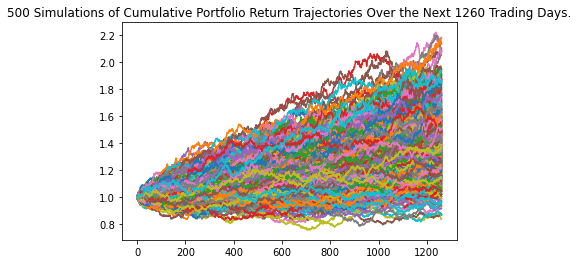

In [93]:
# Plot simulation outcomes
line_plot = ms_stock_data.plot_simulation()

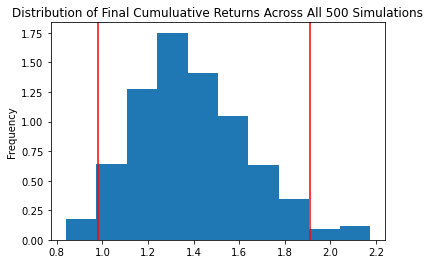

In [94]:
# Plot probability distribution and confidence intervals
dist_plot = ms_stock_data.plot_distribution()

In [95]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = ms_stock_data.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.394013
std               0.244938
min               0.839265
25%               1.219863
50%               1.366536
75%               1.554948
max               2.175296
95% CI Lower      0.982403
95% CI Upper      1.912007
Name: 1260, dtype: float64


In [96]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $58944.17 and $114720.42


### Ten Years Retirement Option

In [97]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
ms_stock_data = MCSimulation(
    portfolio_data = df_stock_data,
    weights= [0.6, 0.4],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [98]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
ms_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.005676  0.994532  0.999990  0.998830  0.998634  0.998631  1.001466   
2     0.999999  1.002573  1.002428  1.012723  1.002975  1.005533  1.003376   
3     0.995694  0.994242  1.001392  1.007213  1.002390  1.011702  0.998561   
4     1.004478  0.991937  0.996679  1.006657  1.003093  1.019077  0.996209   
...        ...       ...       ...       ...       ...       ...       ...   
2516  1.566733  1.456133  1.979274  1.507648  1.922313  1.261405  1.400486   
2517  1.571511  1.461934  1.969859  1.496041  1.910954  1.261949  1.386849   
2518  1.582019  1.448928  1.965053  1.502347  1.913569  1.258562  1.385037   
2519  1.579518  1.448820  1.950833  1.496816  1.919390  1.253763  1.381467   
2520  1.580637  1.436555  1.949322  1.487774  1.917878  1.254449  1.376502   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.000921  1.001231  0.998820  ...  0.994045  1.008682  1.002282   
2     1.008289  1.000593  1.006366  ...  0.990371  1.010326  1.003655   
3     1.003646  1.001980  1.010802  ...  0.990509  1.008545  1.006282   
4     0.996635  1.001503  1.009883  ...  0.991208  1.009428  1.005922   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.965036  1.951964  1.108875  ...  1.968256  1.332331  2.777214   
2517  1.962086  1.950220  1.104029  ...  1.970244  1.333596  2.760859   
2518  1.950921  1.934078  1.111993  ...  1.972350  1.340302  2.762502   
2519  1.949137  1.935308  1.105539  ...  1.962158  1.344993  2.785313   
2520  1.963323  1.935223  1.104191  ...  1.959387  1.349550  2.790951   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.002096  1.007196  0.997912  1.000534  1.011982  1.000924  0.997522  
2     1.005107  1.005123  1.001908  1.006591  1.016416  0.991608  0.991224  
3     1.003795  1.019535  0.998290  1.013921  1.014766  0.994520  0.999813  
4     0.996362  1.020892  0.994558  1.018780  0.999864  0.996335  1.003834  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.761227  2.818696  1.330794  2.502019  3.031446  1.664327  1.885748  
2517  1.757817  2.819931  1.326391  2.520977  3.054537  1.672246  1.880908  
2518  1.752158  2.789841  1.332793  2.523992  3.060146  1.666171  1.891004  
2519  1.746168  2.794433  1.325939  2.525513  3.050198  1.652517  1.879638  
2520  1.750570  2.790112  1.333263  2.533228  3.062665  1.648443  1.878081  

[2521 rows x 500 columns]

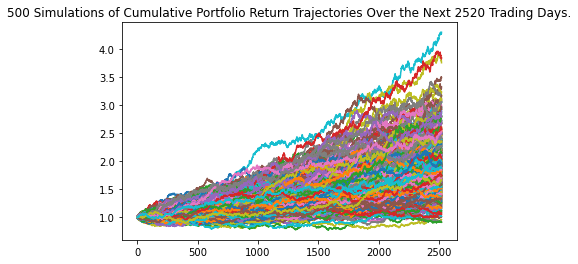

In [99]:
# Plot simulation outcomes
line_plot = ms_stock_data.plot_simulation()

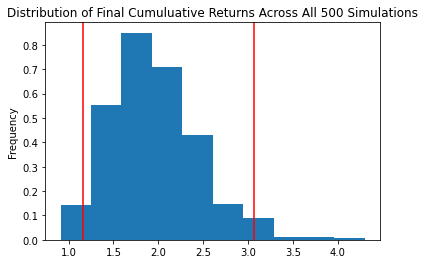

In [100]:
# Plot probability distribution and confidence intervals
dist_plot = ms_stock_data.plot_distribution()

In [101]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = ms_stock_data.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.949125
std               0.494785
min               0.910620
25%               1.606091
50%               1.905648
75%               2.227721
max               4.300968
95% CI Lower      1.159165
95% CI Upper      3.068605
Name: 2520, dtype: float64


In [102]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $69549.89 and $184116.31
